### One vs One, One vs Rest with SVM for multi-class classification

In multiclass classification problems, we need to deal with more than two classes which means the algorithm which we are using should be capable of working with multiple classes. There are various models available for this and some methods are also available that can make support vector machines capable of dealing with more than two classes.  We call these methods heuristic methods. There are two types of heuristic methods:

1. One-vs-Rest (OvR) or One-vs-All(OvA)
2. One-vs-One (OvO) 

In [11]:
import pandas as pd
import numpy as np                            
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
iris_data = datasets.load_iris()

X = iris_data.data[:, [0, 1]]
y = iris_data.target

iris_dataframe = pd.DataFrame(iris_data.data[:, [0, 1]],
                  columns=iris_data.feature_names[0:2])

print(iris_dataframe.head())

print('\n' + 'Unique Labels contained in this data are '
     + str(np.unique(y)))

   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6

Unique Labels contained in this data are [0 1 2]


In [40]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('The training set contains {} samples and the test set contains {} samples'.format(X_train.shape[0], X_test.shape[0]))

The training set contains 105 samples and the test set contains 45 samples


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

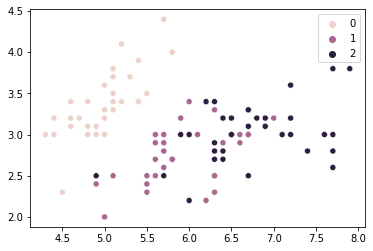

In [42]:
import seaborn as sns
sns.scatterplot(X_train[:, 0], X_train[:, 1], hue=y_train)

In [43]:
standard_scaler = StandardScaler()
#DataFlair
standard_scaler.fit(X_train)
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
print('The first five rows after standardisation look like this:\n')
print(pd.DataFrame(X_train_standard, columns=iris_dataframe.columns).head())

The first five rows after standardisation look like this:

   sepal length (cm)  sepal width (cm)
0          -1.023664         -2.378463
1           0.695175         -0.101903
2           0.924353          0.581065
3           0.122229         -1.923151
4           0.924353         -1.240183


In [44]:
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SVM.fit(X_train_standard, y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(SVM.score(X_train_standard, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(SVM.score(X_test_standard, y_test)))

Accuracy of our SVM model on the training data is 0.81 out of 1
Accuracy of our SVM model on the test data is 0.80 out of 1


### One Vs. Rest Plot

The procedure of conversion of the data can be understood using an example of iris data where we have three classes as follows:

1. Setosa
2. Versicolor 
3. Virginica

The converted data as binary classification data will look like the following:

1. Setosa vs [Versicolor, Virginica]
2. Versicolor vs [Setosa, Virginica]
3. Virginica vs [Setosa, Versicolor]

By looking at the conversion we can think that there is a requirement of three models but with the large datasets creating three models can be a tough and non-accurate approach to modeling. Here One-vs-Rest (OvR) or One-vs-All(OvA) comes to save us where binary classifiers can be trained to predict any class as positive and other classes as negative. 

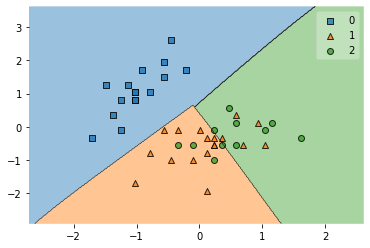

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_standard, np.array(y_test), clf=SVM)
plt.show()

### One Vs. One Plot

This method can also be considered as an approach to making binary classification algorithms capable of working as multiclass classification algorithms.it is similar to the One-Vs-Rest method because it also works based on splitting the data but the splitting behavior of this method is different from the One-Vs-Rest method. This method includes the split of data for each class where each class has every other class as its opponent. We can again use the iris data set to understand the data split behavior of this method. 

In the iris, we have the following classes:

1. Setosa
2. Versicolor 
3. Virginica

Split iris data using the One-vs-One (OvO) methods will look like the following:

1. Setosa vs Versicolor
2. Setosa vs Virginica
3. Versicolor vs Virginica
4. Virginica vs Versicolor

Here we can see using this data we have binary classification data that includes one class with every other class. We can find out the number of data split using the following formula 

Split of data = (number of classes X (number of classes – 1))/2

In [46]:
rbf = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train_standard, y_train)

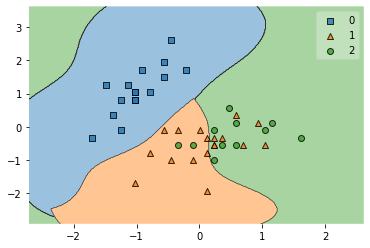

In [47]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_standard, np.array(y_test), clf=rbf)
plt.show()